In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
data_client = 'client.csv'
data_countyidm = 'county_id_to_name_map.json'
data_elec = 'electricity_prices.csv'
data_fw = 'forecast_weather.csv'
data_gp = 'gas_prices.csv'
data_hw = 'historical_weather.csv'
data_t = 'train.csv'
data_wtm = 'weather_station_to_county_mapping.csv'

# data_ = '

In [4]:
df_t = pd.read_csv('../data_enefit_kggl/' + data_t)

df_cl = pd.read_csv('../data_enefit_kggl/' + data_client)
#df_cn = pd.read_json('../data_enefit_kggl/' + data_countyidm) # json
df_el = pd.read_csv('../data_enefit_kggl/' + data_elec)
df_fw = pd.read_csv('../data_enefit_kggl/' + data_fw)
df_hw = pd.read_csv('../data_enefit_kggl/' + data_hw)

df_wtc = pd.read_csv('../data_enefit_kggl/' + data_wtm)

print(df_t.shape, df_cl.shape, df_el.shape, df_fw.shape, df_hw.shape, df_wtc.shape)

(2018352, 9) (41919, 7) (15286, 4) (3424512, 18) (1710800, 18) (112, 4)


In [5]:
print(data_t)
print(df_t.columns)
print(" ")

print(data_client)
print(df_cl.columns)
print(" ")

print(data_elec)
print(df_el.columns)
print(" ")

print(data_fw)
print(df_fw.columns)
print(" ")

train.csv
Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id'],
      dtype='object')
 
client.csv
Index(['product_type', 'county', 'eic_count', 'installed_capacity',
       'is_business', 'date', 'data_block_id'],
      dtype='object')
 
electricity_prices.csv
Index(['forecast_date', 'euros_per_mwh', 'origin_date', 'data_block_id'], dtype='object')
 
forecast_weather.csv
Index(['latitude', 'longitude', 'origin_datetime', 'hours_ahead',
       'temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component',
       '10_metre_v_wind_component', 'data_block_id', 'forecast_datetime',
       'direct_solar_radiation', 'surface_solar_radiation_downwards',
       'snowfall', 'total_precipitation'],
      dtype='object')
 


In [6]:
# df_cl['data_block_id'].value_counts()

print(len(df_cl['data_block_id'].unique()))
print(len(df_el['data_block_id'].unique()))
print(len(df_fw['data_block_id'].unique()))


636
637
637


In [7]:
df_t.columns

Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id'],
      dtype='object')

In [8]:
len(df_t['prediction_unit_id'].unique())

69

In [9]:
df_t[['is_consumption', 'data_block_id', 'prediction_unit_id']]

,is_consumption,data_block_id,prediction_unit_id
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,1
4,0,0,2
...,...,...,...
2018347,1,637,64
2018348,0,637,59
2018349,1,637,59
2018350,0,637,60


In [10]:
print(np.min(df_t['prediction_unit_id']))
print(np.max(df_t['prediction_unit_id']))

0
68


In [11]:
df_t_10 = df_t[df_t['prediction_unit_id'] == 10]
df_t_10_0 = df_t_10[df_t_10['is_consumption'] == 0]
df_t_10_1 = df_t_10[df_t_10['is_consumption'] == 1]

print(df_t.shape, df_t_10.shape, df_t_10_0.shape, df_t_10_1.shape)

(2018352, 9) (30624, 9) (15312, 9) (15312, 9)


In [12]:
df_t_10.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
20,2,1,3,0.000,0,2021-09-01 00:00:00,0,20,10
21,2,1,3,266.637,1,2021-09-01 00:00:00,0,21,10
142,2,1,3,0.000,0,2021-09-01 01:00:00,0,142,10
143,2,1,3,237.904,1,2021-09-01 01:00:00,0,143,10
264,2,1,3,0.000,0,2021-09-01 02:00:00,0,264,10


In [13]:
df_t_10_0 = df_t_10_0.sort_values(by='datetime')
df_t_10_0 = df_t_10_0.reset_index(drop=True)

df_t_10_1 = df_t_10_1.sort_values(by='datetime')
df_t_10_1 = df_t_10_1.reset_index(drop=True)

display(df_t_10_0.head())
display(df_t_10_0.tail())

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,2,1,3,0.0,0,2021-09-01 00:00:00,0,20,10
1,2,1,3,0.0,0,2021-09-01 01:00:00,0,142,10
2,2,1,3,0.0,0,2021-09-01 02:00:00,0,264,10
3,2,1,3,0.0,0,2021-09-01 03:00:00,0,386,10
4,2,1,3,0.0,0,2021-09-01 04:00:00,0,508,10


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
15307,2,1,3,34.817,0,2023-05-31 19:00:00,637,2017728,10
15308,2,1,3,57.675,0,2023-05-31 20:00:00,637,2017858,10
15309,2,1,3,0.892,0,2023-05-31 21:00:00,637,2017988,10
15310,2,1,3,0.000,0,2023-05-31 22:00:00,637,2018118,10
15311,2,1,3,311.962,0,2023-05-31 23:00:00,637,2018248,10


In [14]:
df_t_10_0['datetime'] = pd.to_datetime(df_t_10_0['datetime'])
df_t_10_1['datetime'] = pd.to_datetime(df_t_10_1['datetime'])

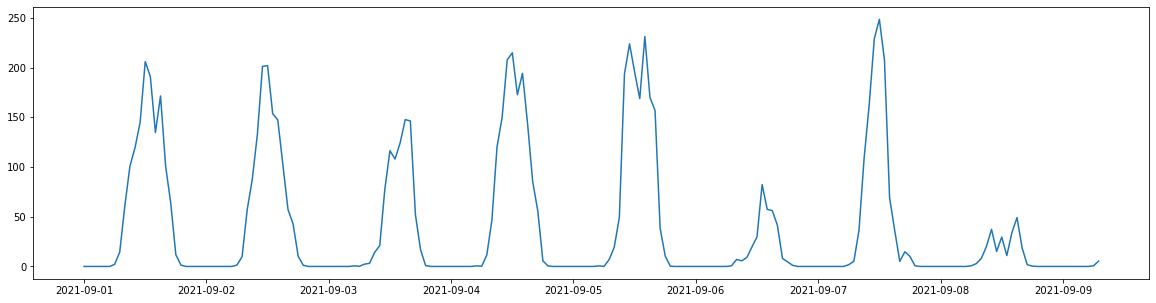

In [15]:
plt.figure(figsize=(20,5))

plt.plot(df_t_10_0['datetime'].head(200), df_t_10_0['target'].head(200))

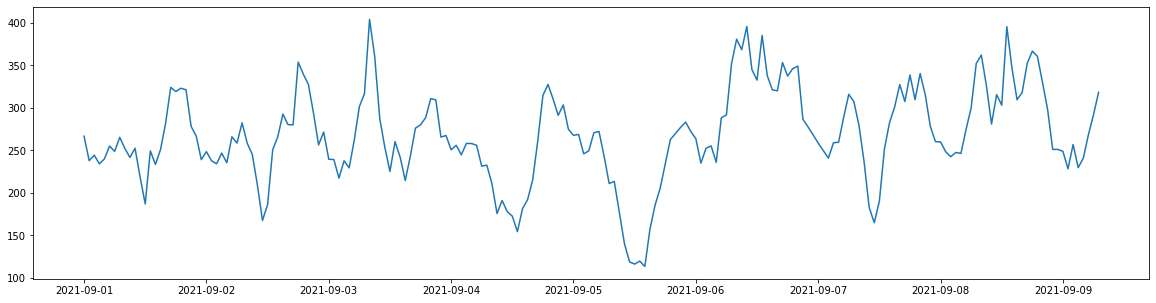

In [16]:
plt.figure(figsize=(20,5))

plt.plot(df_t_10_1['datetime'].head(200), df_t_10_1['target'].head(200))

In [17]:
df_t.columns

Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id'],
      dtype='object')

Text(0, 0.5, 'Eneift Target')

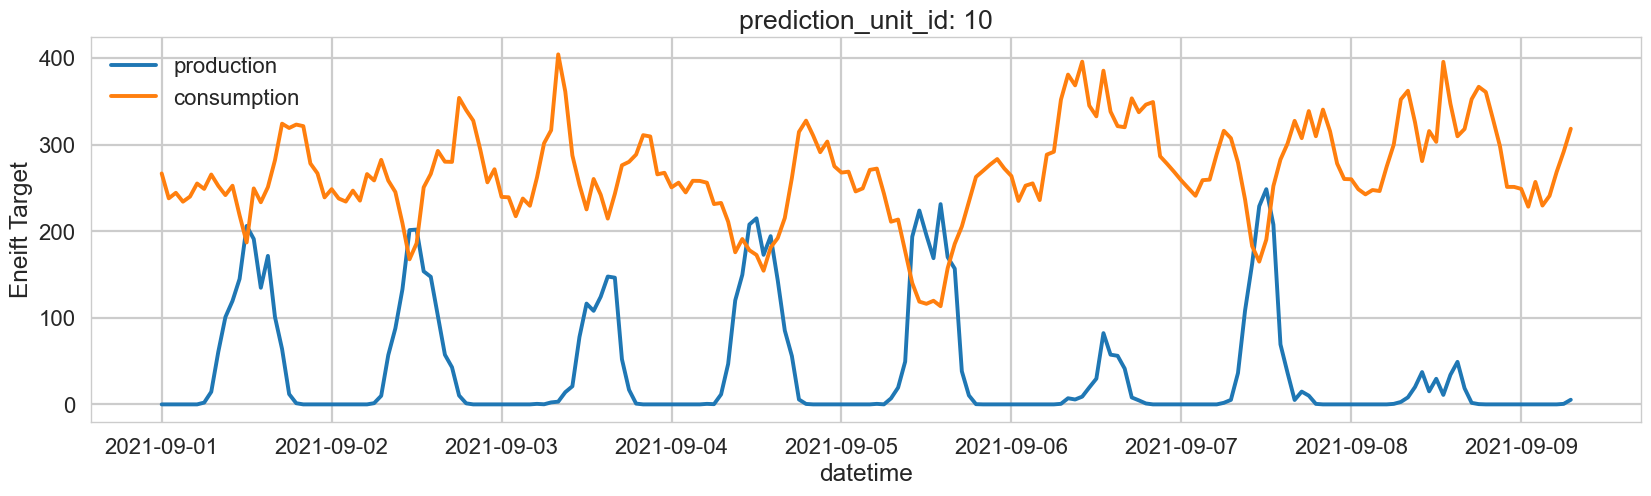

In [23]:
plt.figure(figsize=(20,5))

plt.style.use('default')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')

plt.plot(df_t_10_0['datetime'].head(200), df_t_10_0['target'].head(200), label='production')
plt.plot(df_t_10_1['datetime'].head(200), df_t_10_1['target'].head(200), label='consumption')
plt.legend();

plt.title('prediction_unit_id: ' + str(10));
plt.xlabel('datetime')
plt.ylabel('Eneift Target')

### Understand Weather Data

In [24]:
# Start with historical weather data, likly simpler . . . und that data now.

In [25]:
print(df_hw.columns)
df_hw.head()

Index(['datetime', 'temperature', 'dewpoint', 'rain', 'snowfall',
       'surface_pressure', 'cloudcover_total', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_high', 'windspeed_10m',
       'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
       'diffuse_radiation', 'latitude', 'longitude', 'data_block_id'],
      dtype='object')


,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.4,12.0,0.0,0.0,1015.8,4,4,0,0,6.694444,3,0.0,0.0,0.0,57.6,21.7,1
1,2021-09-01 00:00:00,14.0,12.0,0.0,0.0,1010.6,7,8,0,0,4.944444,353,0.0,0.0,0.0,57.6,22.2,1
2,2021-09-01 00:00:00,14.4,12.8,0.0,0.0,1014.9,6,7,0,0,5.833333,348,0.0,0.0,0.0,57.6,22.7,1
3,2021-09-01 00:00:00,15.4,13.0,0.0,0.0,1014.4,4,2,4,0,7.111111,349,0.0,0.0,0.0,57.6,23.2,1
4,2021-09-01 00:00:00,15.9,12.6,0.0,0.0,1013.8,12,7,0,20,8.388889,360,0.0,0.0,0.0,57.6,23.7,1


In [26]:
df_hw['datetime'].value_counts()

2021-09-01 00:00:00    112
2022-10-30 11:00:00    112
2022-10-29 23:00:00    112
2022-10-30 00:00:00    112
2022-10-30 01:00:00    112
                      ... 
2022-04-01 08:00:00    112
2022-04-01 09:00:00    112
2022-04-01 10:00:00    112
2022-04-01 11:00:00    112
2023-05-30 10:00:00    112
Name: datetime, Length: 15275, dtype: int64

In [27]:
df_hw['latitude'].value_counts()

57.6    213850
57.9    213850
58.2    213850
58.5    213850
58.8    213850
59.1    213850
59.4    213850
59.7    213850
Name: latitude, dtype: int64

In [28]:
df_hw['longitude'].value_counts()

21.7    122200
22.2    122200
22.7    122200
23.2    122200
23.7    122200
24.2    122200
24.7    122200
25.2    122200
25.7    122200
26.2    122200
26.7    122200
27.2    122200
27.7    122200
28.2    122200
Name: longitude, dtype: int64

In [29]:
len(df_hw['datetime'].unique())

15275

In [30]:
ls_dates = df_hw['datetime'].unique()
ls_dates[0:100]

array(['2021-09-01 00:00:00', '2021-09-01 01:00:00',
       '2021-09-01 02:00:00', '2021-09-01 03:00:00',
       '2021-09-01 04:00:00', '2021-09-01 05:00:00',
       '2021-09-01 06:00:00', '2021-09-01 07:00:00',
       '2021-09-01 08:00:00', '2021-09-01 09:00:00',
       '2021-09-01 10:00:00', '2021-09-01 11:00:00',
       '2021-09-01 12:00:00', '2021-09-01 13:00:00',
       '2021-09-01 14:00:00', '2021-09-01 15:00:00',
       '2021-09-01 16:00:00', '2021-09-01 17:00:00',
       '2021-09-01 18:00:00', '2021-09-01 19:00:00',
       '2021-09-01 20:00:00', '2021-09-01 21:00:00',
       '2021-09-01 22:00:00', '2021-09-01 23:00:00',
       '2021-09-02 00:00:00', '2021-09-02 01:00:00',
       '2021-09-02 02:00:00', '2021-09-02 03:00:00',
       '2021-09-02 04:00:00', '2021-09-02 05:00:00',
       '2021-09-02 06:00:00', '2021-09-02 07:00:00',
       '2021-09-02 08:00:00', '2021-09-02 09:00:00',
       '2021-09-02 10:00:00', '2021-09-02 11:00:00',
       '2021-09-02 12:00:00', '2021-09-02 13:0

In [31]:
df_hw[['latitude', 'longitude']].head(5)

,latitude,longitude
0,57.6,21.7
1,57.6,22.2
2,57.6,22.7
3,57.6,23.2
4,57.6,23.7


In [32]:
df_hw_latlong1 = df_hw[ (df_hw['latitude']==57.6) & (df_hw['longitude']==21.7)]
print(df_hw.shape, df_hw_latlong1.shape)

(1710800, 18) (15275, 18)


In [33]:
df_hw_latlong1['datetime'] = pd.to_datetime(df_hw_latlong1['datetime'])
df_hw_latlong1 = df_hw_latlong1.sort_values(by='datetime')
df_hw_latlong1 = df_hw_latlong1.reset_index(drop=True)

<ipython-input-33-a35195147946>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hw_latlong1['datetime'] = pd.to_datetime(df_hw_latlong1['datetime'])


In [34]:
print(df_hw_latlong1.columns)
df_hw_latlong1.head(2)

Index(['datetime', 'temperature', 'dewpoint', 'rain', 'snowfall',
       'surface_pressure', 'cloudcover_total', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_high', 'windspeed_10m',
       'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
       'diffuse_radiation', 'latitude', 'longitude', 'data_block_id'],
      dtype='object')


,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.4,12.0,0.0,0.0,1015.8,4,4,0,0,6.694444,3,0.0,0.0,0.0,57.6,21.7,1
1,2021-09-01 01:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1


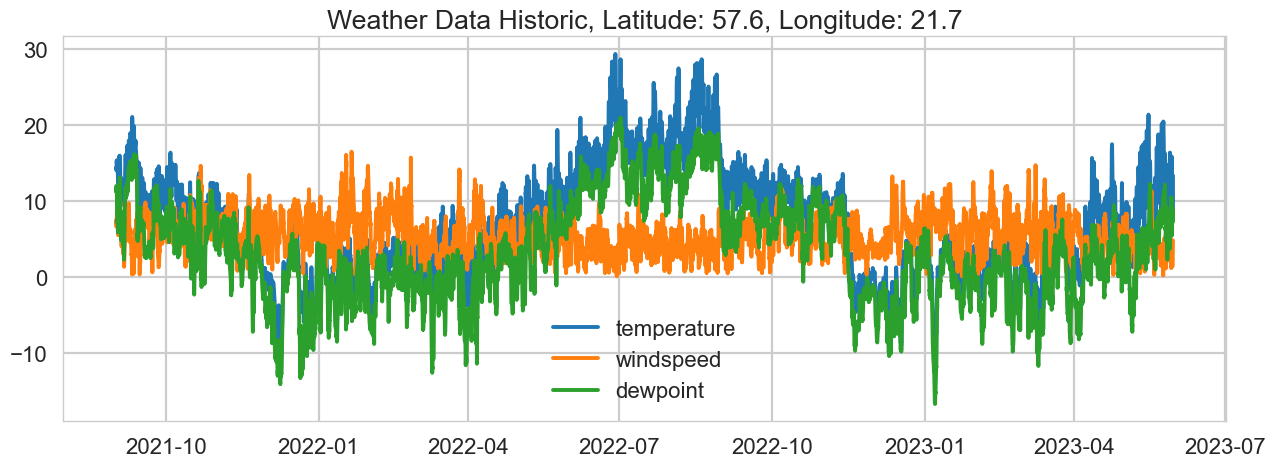

In [37]:
plt.figure(figsize=(15,5))

plt.style.use('default')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')

plt.plot(df_hw_latlong1['datetime'], df_hw_latlong1['temperature'], label='temperature');
plt.plot(df_hw_latlong1['datetime'], df_hw_latlong1['windspeed_10m'], label='windspeed');
plt.plot(df_hw_latlong1['datetime'], df_hw_latlong1['dewpoint'], label='dewpoint');

# plt.title('1 Lat, 1 Lon')
plt.title('Weather Data Historic, Latitude: ' + str(57.6) + ', Longitude: ' + str(21.7))

plt.legend();

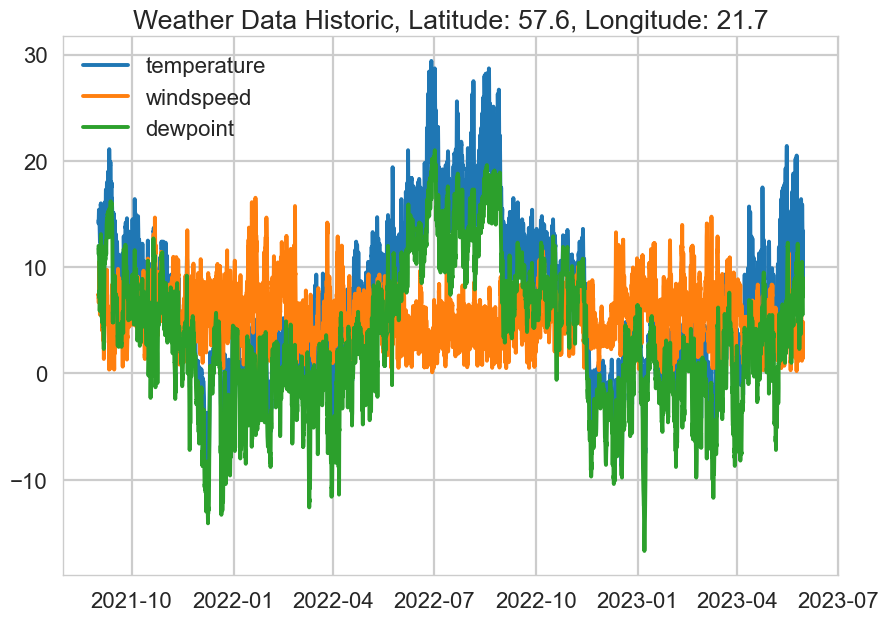

In [39]:
plt.figure(figsize=(10,7))

plt.style.use('default')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')

plt.plot(df_hw_latlong1['datetime'], df_hw_latlong1['temperature'], label='temperature');
plt.plot(df_hw_latlong1['datetime'], df_hw_latlong1['windspeed_10m'], label='windspeed');
plt.plot(df_hw_latlong1['datetime'], df_hw_latlong1['dewpoint'], label='dewpoint');

# plt.title('1 Lat, 1 Lon')
plt.title('Weather Data Historic, Latitude: ' + str(57.6) + ', Longitude: ' + str(21.7))


plt.legend();

### Connect weather station data to target data

In [40]:
df_wtc

,county_name,longitude,latitude,county
0,NaN,21.7,57.6,NaN
1,NaN,21.7,57.9,NaN
2,NaN,21.7,58.2,NaN
3,NaN,21.7,58.5,NaN
4,NaN,21.7,58.8,NaN
...,...,...,...,...
107,NaN,28.2,58.5,NaN
108,NaN,28.2,58.8,NaN
109,NaN,28.2,59.1,NaN
110,NaN,28.2,59.4,NaN


In [41]:
df_wtc['county'].value_counts()

0.0     6
7.0     5
15.0    5
10.0    4
11.0    4
5.0     4
2.0     4
9.0     3
14.0    3
3.0     3
4.0     3
6.0     2
1.0     1
13.0    1
8.0     1
Name: county, dtype: int64

In [42]:
df_t.columns

Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id'],
      dtype='object')

In [43]:
df_t.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [44]:
df_t['county'].value_counts()

0     212928
11    198000
7     173088
5     151632
15    148752
4     147264
10    134640
14    125808
3     122496
9     122496
13    121056
2     115200
1      91872
8      91872
6      30624
12     30624
Name: county, dtype: int64

In [45]:
df_wtc['county'].value_counts()

0.0     6
7.0     5
15.0    5
10.0    4
11.0    4
5.0     4
2.0     4
9.0     3
14.0    3
3.0     3
4.0     3
6.0     2
1.0     1
13.0    1
8.0     1
Name: county, dtype: int64

In [46]:
df_wtc

,county_name,longitude,latitude,county
0,NaN,21.7,57.6,NaN
1,NaN,21.7,57.9,NaN
2,NaN,21.7,58.2,NaN
3,NaN,21.7,58.5,NaN
4,NaN,21.7,58.8,NaN
...,...,...,...,...
107,NaN,28.2,58.5,NaN
108,NaN,28.2,58.8,NaN
109,NaN,28.2,59.1,NaN
110,NaN,28.2,59.4,NaN


In [47]:
# https://www.geeksforgeeks.org/how-to-drop-rows-with-nan-values-in-pandas-dataframe/
# df.dropna(subset, inplace=True)

In [48]:
df_wtc_noNaN = df_wtc.dropna()

In [49]:
print(df_wtc.shape, df_wtc_noNaN.shape)

(112, 4) (49, 4)


In [50]:
df_wtc_noNaN

,county_name,longitude,latitude,county
10,Saaremaa,22.2,58.2,10.0
11,Saaremaa,22.2,58.5,10.0
19,Saaremaa,22.7,58.5,10.0
20,Hiiumaa,22.7,58.8,1.0
27,Saaremaa,23.2,58.5,10.0
35,Pärnumaa,23.7,58.5,7.0
36,Läänemaa,23.7,58.8,6.0
37,Läänemaa,23.7,59.1,6.0
43,Pärnumaa,24.2,58.5,7.0
44,Raplamaa,24.2,58.8,9.0


In [51]:
df_wtc_noNaN['county_name'].value_counts()

Harjumaa         6
Pärnumaa         5
Võrumaa          5
Saaremaa         4
Tartumaa         4
Lääne-Virumaa    4
Ida-Virumaa      4
Raplamaa         3
Viljandimaa      3
Järvamaa         3
Jõgevamaa        3
Läänemaa         2
Hiiumaa          1
Valgamaa         1
Põlvamaa         1
Name: county_name, dtype: int64

In [52]:
df_wtc_noNaN['county'].value_counts()

0.0     6
7.0     5
15.0    5
10.0    4
11.0    4
5.0     4
2.0     4
9.0     3
14.0    3
3.0     3
4.0     3
6.0     2
1.0     1
13.0    1
8.0     1
Name: county, dtype: int64

In [53]:
df_t.head(3)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1


In [54]:
df_hw.head(3)

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.4,12.0,0.0,0.0,1015.8,4,4,0,0,6.694444,3,0.0,0.0,0.0,57.6,21.7,1
1,2021-09-01 00:00:00,14.0,12.0,0.0,0.0,1010.6,7,8,0,0,4.944444,353,0.0,0.0,0.0,57.6,22.2,1
2,2021-09-01 00:00:00,14.4,12.8,0.0,0.0,1014.9,6,7,0,0,5.833333,348,0.0,0.0,0.0,57.6,22.7,1
